In [ ]:
import scipy.io as sio
import os
import pandas as pd
from PIL import Image
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

In [ ]:
dataset_dir = "dataset"
data = sio.loadmat(f"{dataset_dir}\cars_annos.mat")
cars_train_annos = pd.read_csv(f"{dataset_dir}\cars_train_annos.csv")
cars_test_annos = pd.read_csv(f"{dataset_dir}\cars_test_annos.csv")

In [8]:
def get_assets(df, pos, is_train=True):
    folder = "cars_train/cars_train" if is_train else "cars_test/cars_test"
    folder = os.path.join(dataset_dir, folder)
    image_path = os.path.join(folder, df['file_name'][pos])
    image = Image.open(image_path)
    title = df['class_name'][pos] if is_train else 'Unclassified'

    xy = df['x1'][pos], df['y1'][pos]
    width = df['x2'][pos] - df['x1'][pos]
    height = df['y2'][pos] - df['y1'][pos]
    rect = Rectangle(xy, width, height, fill=False, color='r', linewidth=2)
    
    # Crop the image
    cropped_image = image.crop((df['x1'][pos], df['y1'][pos], df['x2'][pos], df['y2'][pos]))
    
    return (cropped_image, title, rect, xy)

Audi TTS Coupe 2012


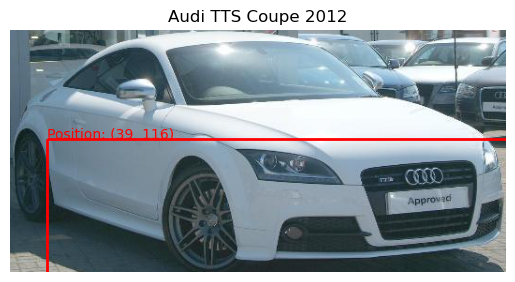

Cropped image saved to: cropped_dataset\cars_train/cars_train\00001.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00002.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00003.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00004.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00005.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00006.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00007.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00008.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00009.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00010.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00011.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00012.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00013.jpg
Cropped image saved to: cropped_dataset\cars_train/cars_train\00

In [9]:
def display_image(df, pos):
    cropped_image, title, rect, xy = get_assets(df, pos)
    print(title)

    plt.imshow(cropped_image)
    plt.axis('off')
    plt.title(title)
    plt.gca().add_patch(rect)
    plt.text(xy[0], xy[1], f'Position: {xy}', color='r') 
    plt.show()

def save_cropped_image(df, pos, output_dir, is_train):
    cropped_image, _, _, _ = get_assets(df, pos)
    title = df['file_name'][pos]
    folder = "cars_train/cars_train" if is_train else "cars_test/cars_test"
    output_folder = os.path.join(output_dir, folder)
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, title)
    cropped_image.save(output_path)
    print(f"Cropped image saved to: {output_path}")

train_df = pd.read_csv(os.path.join(dataset_dir, "cars_train_annos.csv"))
display_image(train_df, 0)

# Save cropped images to a new directory
output_dir = "cropped_dataset"
for i in range(len(train_df)):
    save_cropped_image(train_df, i, output_dir, is_train=True)

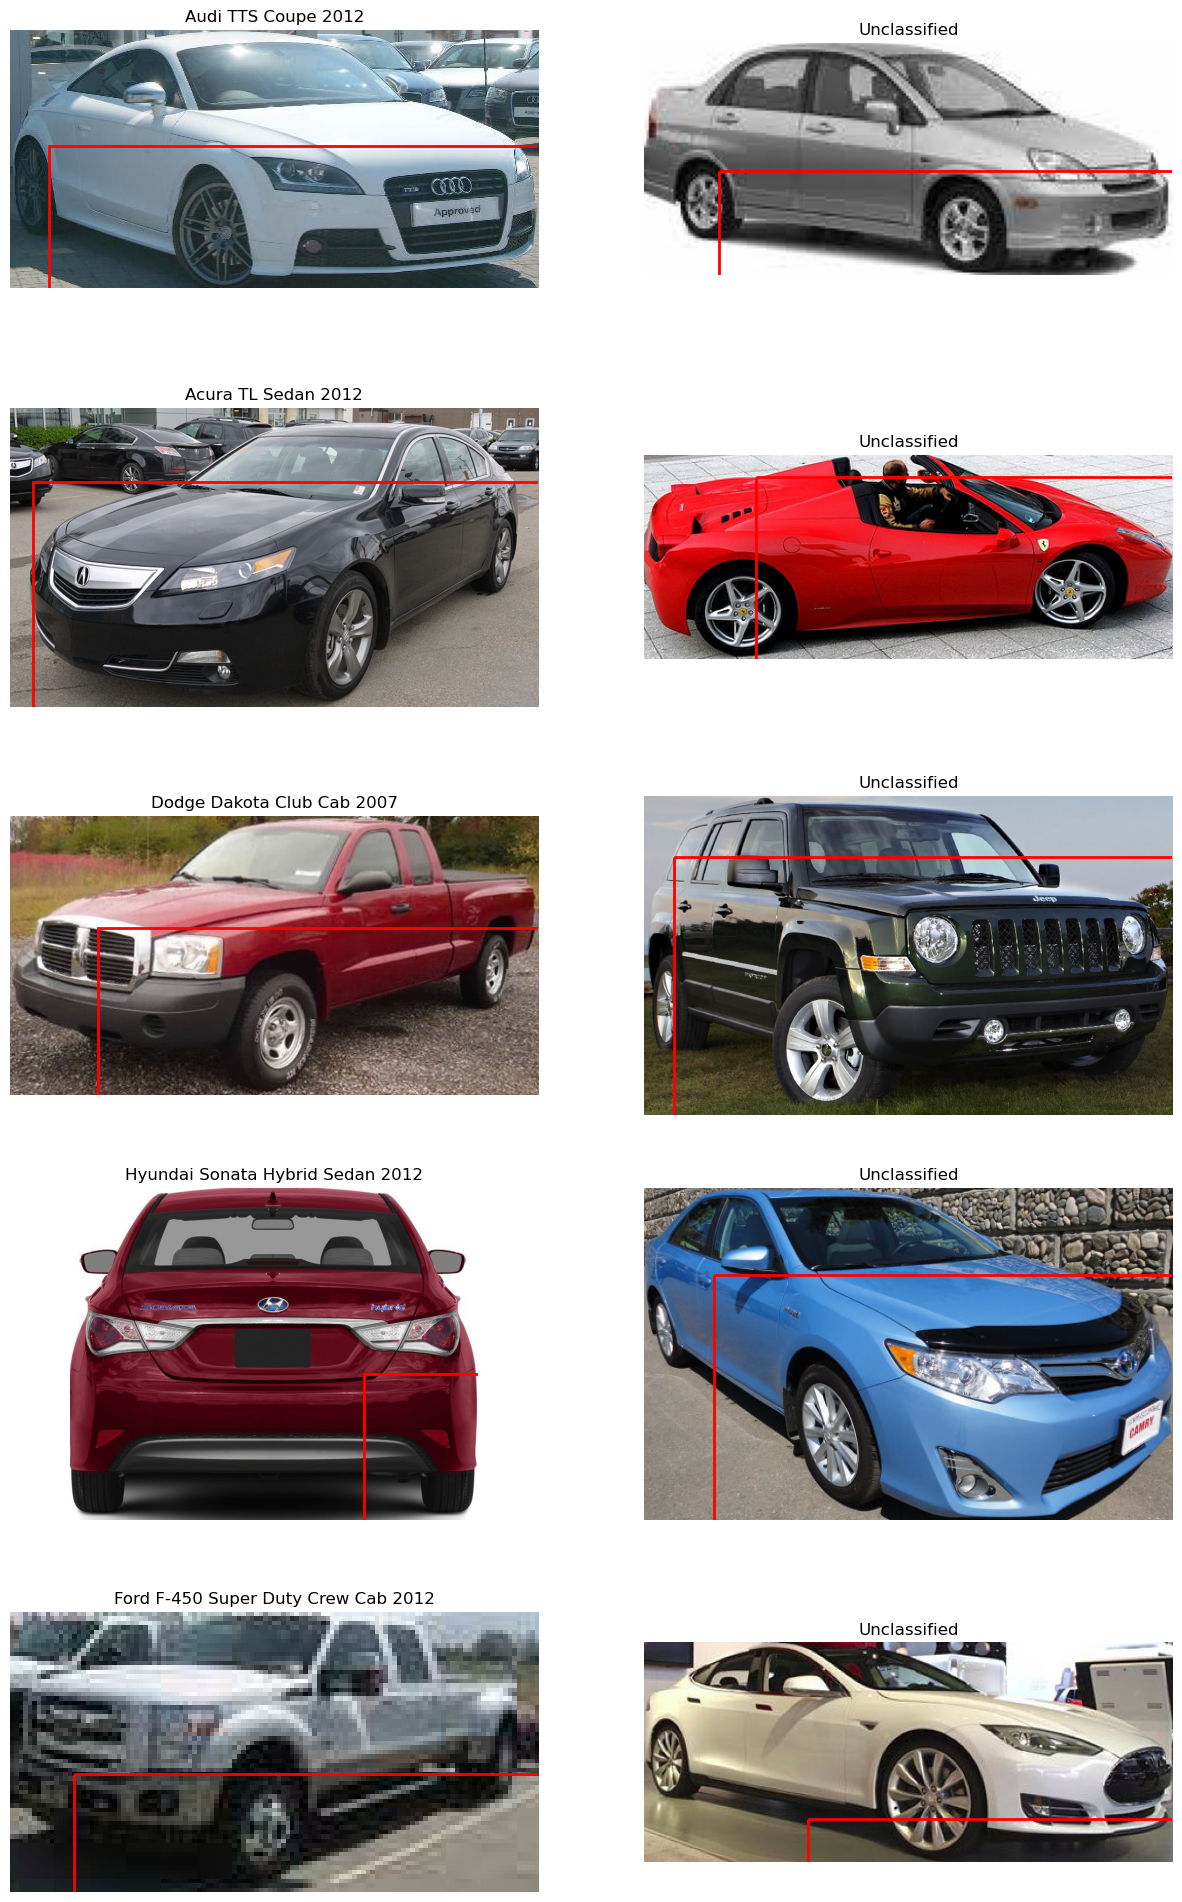

In [12]:
def display_range_train_test_img(train_df, test_df, end, start=0):
    n = end - start
    fig, ax = plt.subplots(n, 2, figsize=(15, 5 * end))

    for i in range(start, end):
        line = i - start

        # Get assets for train_df
        assets_train = get_assets(train_df, i)
        im_train, title_train, rect_train = assets_train[:3]  # Unpack first three values
        additional_assets_train = assets_train[3:] if len(assets_train) > 3 else []

        sub = ax[line, 0]
        sub.imshow(im_train)
        sub.axis('off')
        sub.set_title(title_train)
        sub.add_patch(rect_train)

        # Get assets for test_df
        assets_test = get_assets(test_df, i, is_train=False)
        im_test, title_test, rect_test = assets_test[:3]  # Unpack first three values
        additional_assets_test = assets_test[3:] if len(assets_test) > 3 else []

        sub = ax[line, 1]
        sub.imshow(im_test)
        sub.axis('off')
        sub.set_title(title_test)
        sub.add_patch(rect_test)

    plt.show()

test_df = pd.read_csv(f"{dataset_dir}/cars_test_annos.csv")
display_range_train_test_img(train_df=train_df, test_df=test_df, end=5)

Cars Distribution:

In [13]:
freq_labels = train_df.groupby('class_name').count()[['class_id']]
freq_labels = freq_labels.rename(columns={'class_id': 'count'})
freq_labels = freq_labels.sort_values(by='count', ascending=False)
freq_labels.head()

,count
class_name,
GMC Savana Van 2012,68
Chrysler 300 SRT-8 2010,49
Mercedes-Benz 300-Class Convertible 1993,48
Mitsubishi Lancer Sedan 2012,48
Jaguar XK XKR 2012,47


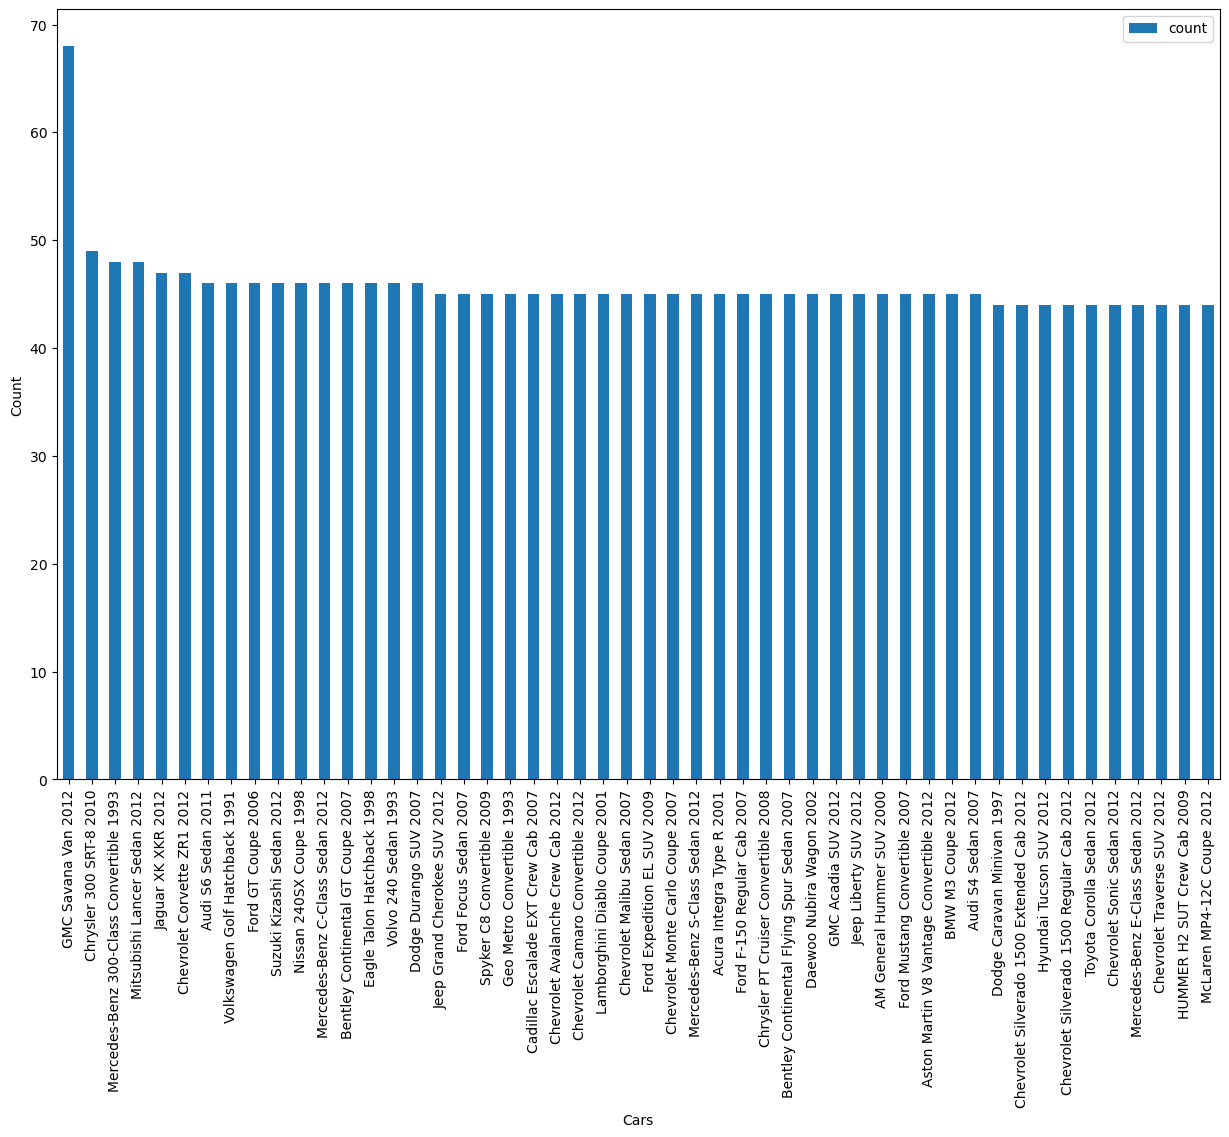

In [14]:
freq_labels.head(50).plot.bar(figsize=(15,10))
plt.xticks(rotation=90);
plt.xlabel("Cars");
plt.ylabel("Count");